In [9]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2,mi1,mi2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, mi1, mi2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + mi1 * (x1 - L1)**3 + k2 * (x2 - x1 - L2) - mi2 * (x2 - x1 - L2)**3 ) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + mi2 * (x2 - x1 - L2)**3) / m2]
    return f

In [19]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np
import math

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0
# Nonlinear coefficients
mi1=-1/6
mi2=-1/10

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -0.5
y1 = 0.5
x2 = 3.001
y2 = 5.9

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50
numpoints = 2000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, mi1, mi2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('Ejemplo3_2.dat', 'w') as E32:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=E32)

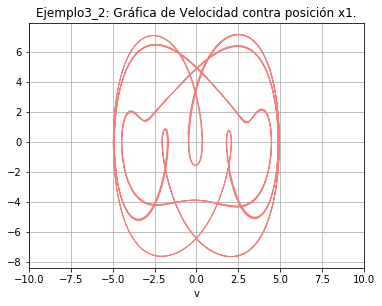

In [20]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, xlim
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('Ejemplo3_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
lw = 1

plot(x1, y1, 'lightcoral', linewidth=lw)
xlim(-10,10)

title('Ejemplo3_2: Gráfica de Velocidad contra posición x1.')
savefig('Ejemplo3_2Velocidad1.png', dpi=100)

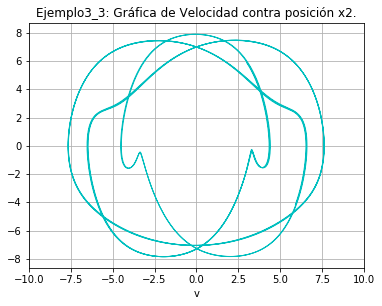

In [21]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig,xlim
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('Ejemplo3_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
lw = 1

plot(x2, y2, 'c', linewidth=lw)
xlim(-10,10)

title('Ejemplo3_3: Gráfica de Velocidad contra posición x2.')
savefig('Ejemplo3_3Velocidad2.png', dpi=100)

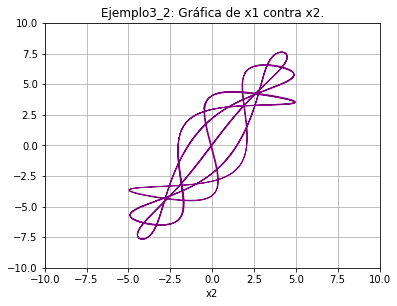

In [16]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, xlim, ylim
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('Ejemplo3_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x2')
grid(True)
lw = 1

plot(x1, x2, 'purple', linewidth=lw)
xlim(-10,10)
ylim(-10,10)
title('Ejemplo3_2: Gráfica de x1 contra x2.')
savefig('Ejemplo3_2Posiciones.png', dpi=100)